In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [11]:
R1 = 0.00475 # in m
R2 = 0.00635 # in m
R3 = 0.014   # in m
Vhmax = 0.1     # in m/s
Vcmax = 0.01    # in m/s
rho = 1000   # in kg/m^3
Cp = 4181    # in J/K/Kg
Pr = 6.62    # Prandl number
mu = 959e-6
Thi = 350    # Celsius
Tci = 300    # Celsius
PI = math.pi

##### Mass Flowrate Calculation

In [12]:
# hot fluid mass flowrate
Mh = rho * Vhmax * PI *(R1**2) / 2
# cold fluid mass flowrate
R = (R3 - R2)/2
R0 = (R3 + R2)/2
Mc = rho * Vcmax * PI * (R3**2 - R2**2 - (2 / R**2) * ((R3**4 - R2**4)/4 + (R0**2/2) * (R3**2 - R2**2) - (2*R0/3) * (R3**3 - R2**3)))
print("Hot Fluid mass flowrate:", Mh, "Kg/s")
print("Cold Fluid mass flowrate:", Mc, "Kg/s")

Hot Fluid mass flowrate: 0.0035441092123309854 Kg/s
Cold Fluid mass flowrate: 0.003260501935528178 Kg/s


#### Calculation of Heat Transfer Coefficient

In [13]:
Rei = rho * (2*Vhmax/3) * R1 / mu
Reo = rho * (2*Vcmax/3) * ((R2+R3)/2) / mu
print("Inner fluid Reynolds Number:",Rei)
print("Outer fluid Reynolds Number:",Reo)

Inner fluid Reynolds Number: 330.20507473062224
Outer fluid Reynolds Number: 70.73340285019118


##### Calculating Nusselt number using Gnielinski correlation

In [136]:
def Nusselt_number(Re):
    f = (0.79 * math.log(Re) - 1.64)**(-2)
    Nu = ((f/8) * (Re - 1000) * Pr) / (1 + 12.7 * (f/8)**(0.5) * (Pr**(2/3) - 1))
    return Nu

In [137]:
Nui = Nusselt_number(Rei)
Nuo = Nusselt_number(Reo)

In [138]:
Kl = mu * Cp / Pr
hi = Nui * Kl / R1
ho = Nuo * Kl / R3
print("hi:", hi)
print("ho:", ho)

hi: 4998.896095180623
ho: 2427.355765592358


In [139]:
K = 111
z = np.linspace(0, 0.5, 50)
UA = (1/(hi*2*PI*R1*z) + math.log(R1/R2)/(2*PI*K*z) + 1/(ho*2*PI*R2*z))**(-1)
UA[0] = 0
print(UA)

[ 0.          0.61425855  1.22851709  1.84277564  2.45703419  3.07129273
  3.68555128  4.29980983  4.91406838  5.52832692  6.14258547  6.75684402
  7.37110256  7.98536111  8.59961966  9.2138782   9.82813675 10.4423953
 11.05665384 11.67091239 12.28517094 12.89942948 13.51368803 14.12794658
 14.74220513 15.35646367 15.97072222 16.58498077 17.19923931 17.81349786
 18.42775641 19.04201495 19.6562735  20.27053205 20.88479059 21.49904914
 22.11330769 22.72756623 23.34182478 23.95608333 24.57034188 25.18460042
 25.79885897 26.41311752 27.02737606 27.64163461 28.25589316 28.8701517
 29.48441025 30.0986688 ]


In [140]:
delta_To = Thi - Tci
delta_T = delta_To * np.exp(-UA * (1/(Mc * Cp) + 1/(Mh * Cp)))

In [141]:
print(delta_T)

[50.         49.83954903 49.67961295 49.52019011 49.36127886 49.20287756
 49.04498458 48.88759827 48.73071702 48.57433921 48.41846321 48.26308742
 48.10821024 47.95383006 47.79994529 47.64655434 47.49365563 47.34124757
 47.18932859 47.03789712 46.88695159 46.73649046 46.58651215 46.43701513
 46.28799785 46.13945877 45.99139635 45.84380907 45.6966954  45.55005382
 45.40388281 45.25818087 45.1129465  44.96817818 44.82387442 44.68003374
 44.53665465 44.39373566 44.2512753  44.1092721  43.96772459 43.82663131
 43.6859908  43.54580161 43.40606229 43.2667714  43.12792749 42.98952914
 42.8515749  42.71406337]


##### Extracting the temperature obtained from simulation

In [142]:
with open("temperature1.txt", 'r') as file1:
    outer_temp = file1.readlines()
    outer_temp = [float(t) for t in outer_temp]

with open("temperature2.txt", 'r') as file2:
    inner_temp = file2.readlines()
    inner_temp = [float(t) for t in inner_temp]

delta_T_simul = [inner_temp[i] - outer_temp[i] for i in range(len(inner_temp))]
print(delta_T_simul)

[50.0, 48.25160992723471, 47.58028456340918, 47.12415800415795, 46.69687110187175, 46.340830301455696, 46.04218555093507, 45.787338877338755, 45.567933991684185, 45.37123960499008, 45.196257796258806, 45.035005197505996, 44.88822765072797, 44.75455431392953, 44.629620582120936, 44.510674376300415, 44.399842775466425, 44.295250779627054, 44.19590046777637, 44.101418918918625, 44.00918529106008, 43.9221933471938, 43.83844724532298, 43.7573219854479, 43.67919048856504, 43.60393191268122, 43.529298336799286, 43.45728560291053, 43.388518711017525, 43.320749740124256, 43.25697245322306, 43.193074324323845, 43.13017411642534, 43.07085239085228, 43.0103638253633, 42.951956860707014, 42.894838877339566, 42.838054833679735, 42.78393451143478, 42.72910472973058, 42.67739561677155, 42.625769230769095, 42.57424896049906, 42.52372661122507, 42.47384875259871, 42.42582250519786, 42.37775467775492, 42.329955821205544, 42.28446595633949, 42.243344594595555, 42.223692231895654]


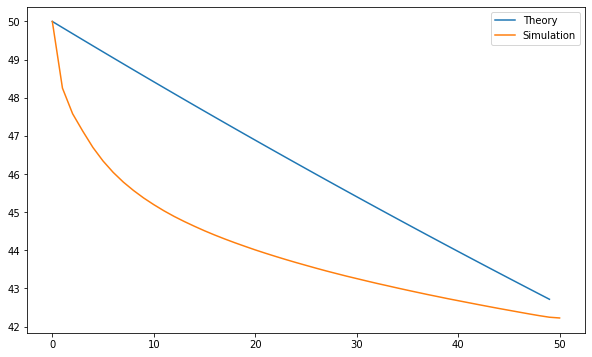

In [151]:
plt.plot(delta_T)
plt.plot(delta_T_simul)
plt.legend(['Theory', 'Simulation'])
plt.rcParams["figure.figsize"] = (10,3)
plt.show()